# Isophote Examples with Sigma-Clipping
In this example, we perform the same ellipse fitting as in the first example, with the main difference being that the fit is performed with $\sigma$-clipping.

We will start by opening the same image of the spiral galaxy:

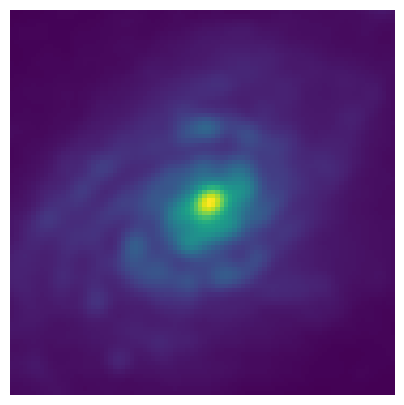

In [1]:
import astropy
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

path = "/Users/ruby/Documents/Python Scripts/Filters/HighRes/" # use your own path to directory here
hdu = fits.open(path+"F115W/47.fits")[0]
data_img = hdu.data


fig = plt.figure(figsize=(12,5))
plt.imshow(data_img)
plt.axis("off")
plt.show()

In [2]:
from photutils.isophote import Ellipse
ellipse = Ellipse(data_img)

We implement the $\sigma$-clipping via the parameters of the *fit_image* method. In this example, due to the contamination of the image by non-elliptical features, we apply quite an aggressive clipping. We also show the Astropy Qtable.

In [3]:
isolist = ellipse.fit_image(sclip=2., nclip=3)
isolist.to_table()

sma,intens,intens_err,ellipticity,ellipticity_err,pa,pa_err,grad,grad_error,grad_rerror,x0,x0_err,y0,y0_err,ndata,nflag,niter,stop_code
,,,,,deg,deg,,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,float64,float64,float64,int64,int64,int64,int64
0.0,0.7503100721533544,0.0,0.0,0.0,0.0,0.0,0.0,None,None,46.03452548276411,0.0,44.70828250870169,0.0,1,0,0,0
0.5209868481924366,0.748833153832114,3.181944314453589e-05,0.8273028687955992,0.007812331883396497,94.25761015219189,0.3551453720895249,-0.005140331208463038,0.0010583332440211473,0.20588814243695194,46.03452548276411,0.0017207456507395513,44.70828250870169,0.011877728080918965,10,3,12,1
0.5730855330116803,0.7482298000834251,3.0094893756478565e-05,0.8273028687955992,0.005482875874300204,94.25761015219189,0.27075028645218757,-0.005128100930221241,0.0009182531389011024,0.17906300039642284,46.04675714929602,0.001338821174329904,44.4490861454614,0.009727611470148398,9,4,2,1
0.6303940863128483,0.7480202839515797,2.7316597762906323e-05,0.8273028687955992,0.006175031121978607,94.25761015219189,0.3765472230698958,-0.004162523069078024,0.0010590349932330496,0.2544214111629224,46.05139424580175,0.002014473303536072,44.44943136057381,0.01219936488434431,10,3,7,1
0.6934334949441332,0.7478288456356512,4.538710017259615e-05,0.8273028687955992,0.0057599252761012945,94.25761015219189,0.25234471495256955,-0.004650720303765187,0.0008707560509124359,0.18723036304881172,46.064035794129914,0.0016558707970215233,44.38168479017312,0.010899468127826864,10,3,50,1
0.7627768444385465,0.73741656252519,0.0007332333153338794,0.18568324645524606,0.05903673140346848,123.19868891352789,10.37529383585278,-0.04711570418238843,0.013527026316605698,0.28710228471257826,46.25443627006071,0.02465366285727272,44.49828463131857,0.02642365425475366,13,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34.52271214393103,0.07087587188735785,0.0007046076114344844,0.2887874072741461,0.01392822494659184,161.04998693521608,1.58405504536811,-0.003052788609635747,0.00028222400139124663,0.09244793448863171,40.68560443425245,0.3153694827383583,45.51396073205808,0.255443721145499,162,20,10,0


Note how the added stability provided by the $\sigma$-clipping allows the fit to proceed further outwards before sensing a too low signal-to-noise ($S/N$) ratio.

### Plotting Results
We will plot the results following the same procedure as in the first example.

In [4]:
plt.rcParams['image.origin'] = 'lower'

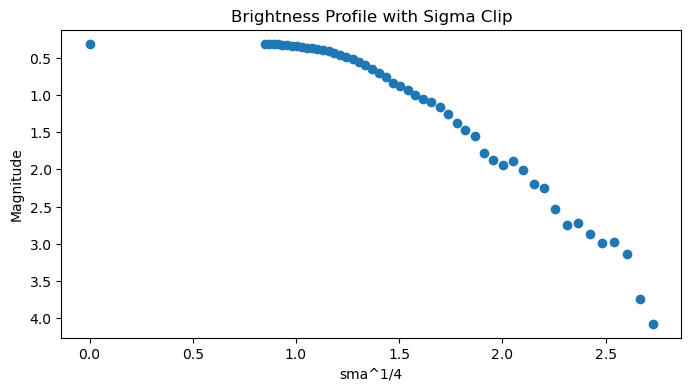

In [5]:
plt.figure(figsize=(8, 4))

plt.scatter(isolist.sma**0.25, -2.5*np.log10(isolist.intens))
plt.title('Brightness Profile with Sigma Clip')
plt.xlabel('sma^1/4')
plt.ylabel('Magnitude')
plt.gca().invert_yaxis()

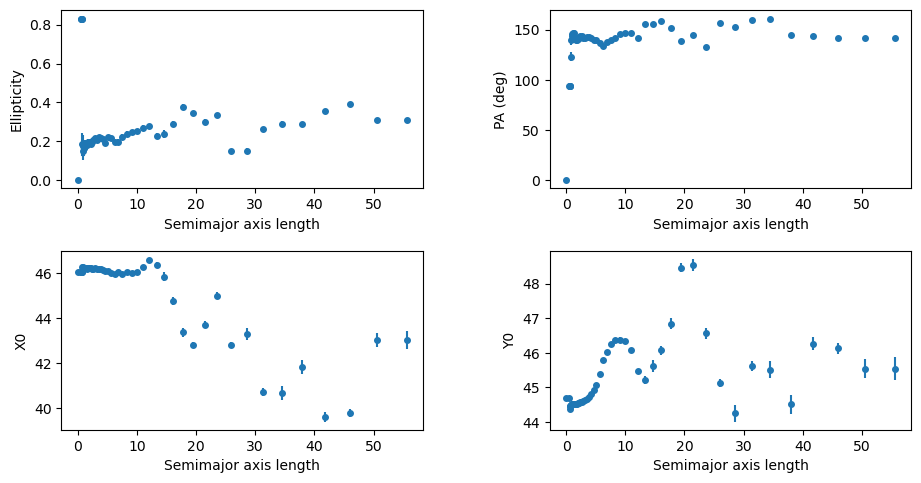

In [6]:
plt.figure(figsize=(10, 5))
plt.figure(1)

plt.subplot(221)
plt.errorbar(isolist.sma, isolist.eps, yerr=isolist.ellip_err, fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('Ellipticity')

plt.subplot(222)
plt.errorbar(isolist.sma, isolist.pa/np.pi*180., yerr=isolist.pa_err/np.pi*80., fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('PA (deg)')

plt.subplot(223)
plt.errorbar(isolist.sma, isolist.x0, yerr=isolist.x0_err, fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('X0')

plt.subplot(224)
plt.errorbar(isolist.sma, isolist.y0, yerr=isolist.y0_err, fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('Y0')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)

We can plot a few of the isophotes on top of the data image.

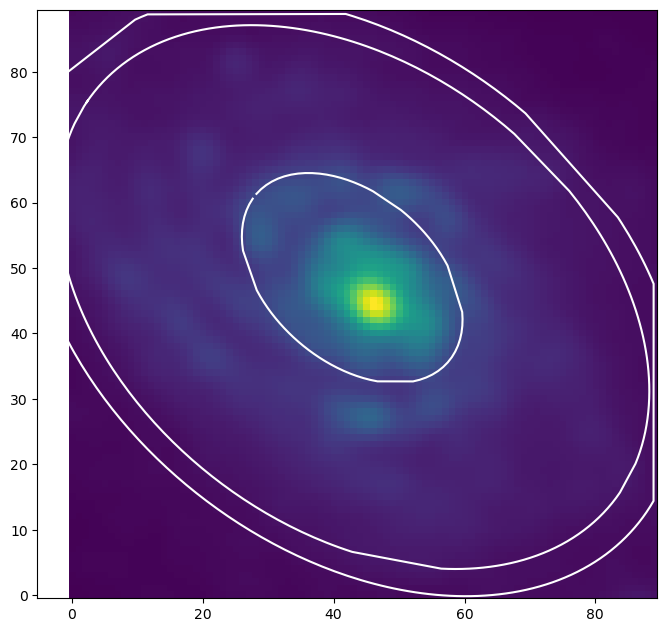

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(data_img)

isos = []
smas = [20., 50., 90.]
for sma in smas:
    iso = isolist.get_closest(sma)
    isos.append(iso)
    x, y = iso.sampled_coordinates()
    plt.plot(x, y, color='white')

We can also plot the brightness samples associated with each isophote.

Note that the angles in the raw sample arrays are define with respect to the semi-major axis position angle. To plot everything in the same coordinate system, we must offset each isophote's angle array by the corresponding position angle. We finally normalise the angles such that they are in the range $[0^{\circ}, 360^{\circ}]$.

Text(0, 0.5, 'Intensity')

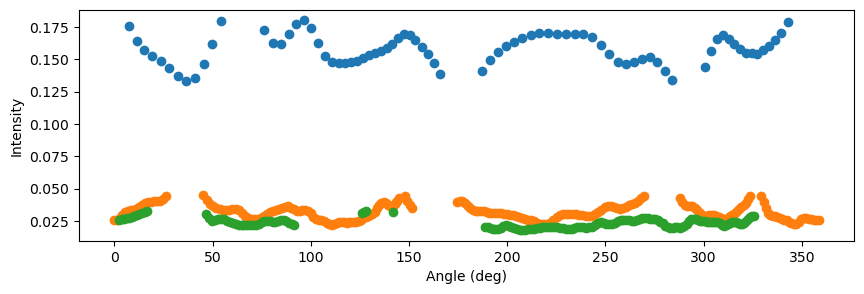

In [8]:
plt.figure(figsize=(10, 3))
for iso in isos:
    angles = ((iso.sample.values[0] + iso.sample.geometry.pa) / np.pi*180.) % 360.
    plt.scatter(angles, iso.sample.values[2])

plt.xlabel('Angle (deg)')
plt.ylabel('Intensity')

We can also plot the parameters that measure deviations from a perfect ellipse:
(*Note that A3, B3, A4, B4 are the higher order harmonics, where B4 is positive for galaxies with disk/kite-like isophotes and negative for galaxies with boxy isophotes. See the documentation: https://photutils.readthedocs.io/en/stable/api/photutils.isophote.Isophote.html*).

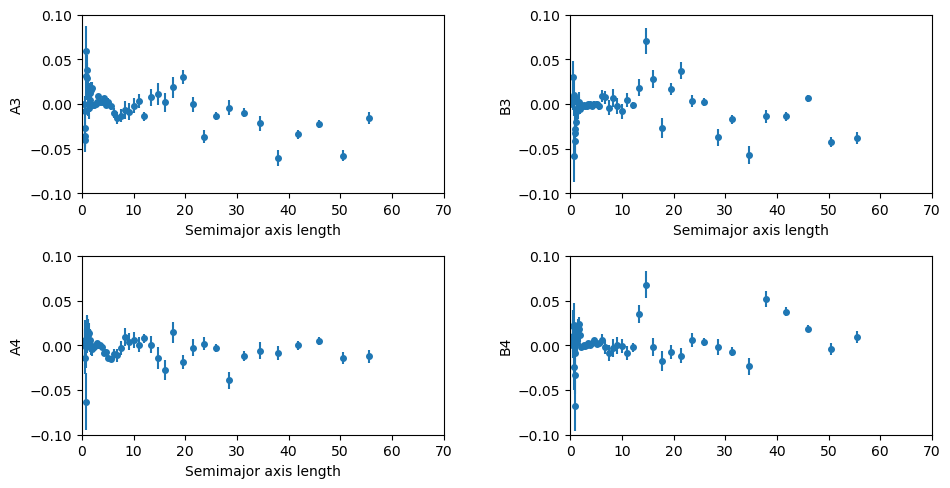

In [9]:
plt.figure(figsize=(10, 5))
plt.figure(1)
limits = [0., 70., -0.1, 0.1]

plt.subplot(221)
plt.axis(limits)
plt.errorbar(isolist.sma, isolist.a3, yerr=isolist.a3_err, fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('A3')

plt.subplot(222)
plt.axis(limits)
plt.errorbar(isolist.sma, isolist.b3, yerr=isolist.b3_err, fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('B3')

plt.subplot(223)
plt.axis(limits)
plt.errorbar(isolist.sma, isolist.a4, yerr=isolist.a4_err, fmt='o', markersize=4)
plt.xlabel('Semimajor axis length')
plt.ylabel('A4')

plt.subplot(224)
plt.axis(limits)
plt.errorbar(isolist.sma, isolist.b4, yerr=isolist.b4_err, fmt='o', markersize=4)
plt.xlabel=('Semimajor axis length')
plt.ylabel('B4')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)